# Polynomial Regression

## Importing the libraries

Here, we import NumPy, Scikit-learn, and Matplotlib to make our code shorter and more efficient!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The dataset provides a series of positions, along with the corresponding salaries. The "iloc" method is used to select the rows of data.

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

We then import the linear regression class from the scikit-learn library, and use the fit method to train the model on the whole dataset!

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

We do the same thing for the polynomial regression, by first imporying the polynomial features class. Then, we specify to create the features to the fourth degree. Next, we fit and transform the data to their polynomial combinations.

A new linear regression is then fitted to the polynomial features.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

## Visualising the Linear Regression results

Here, we visualise the linear regression with Matplotlib.


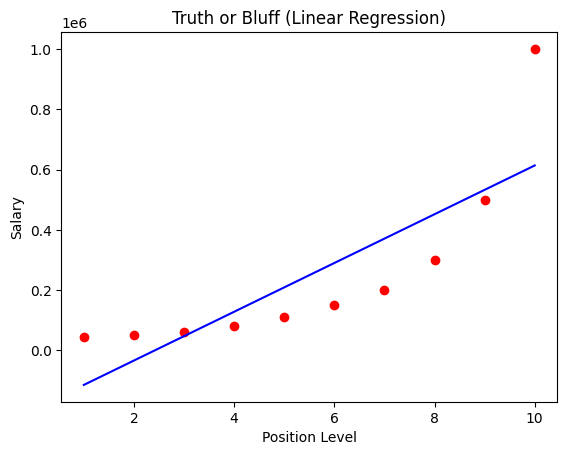

In [13]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

Here, we visualise the polynomial regression with Matplotlib, which clearly fits the data better.

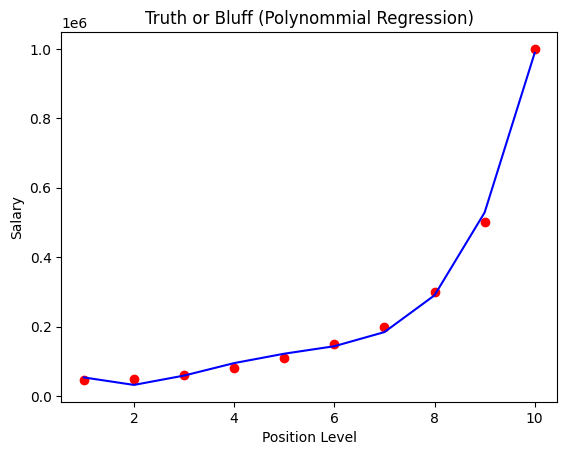

In [14]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynommial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

Here, the model is calculated in increments of 0.1 instead of 1 to have a smoother and more accurate curve.

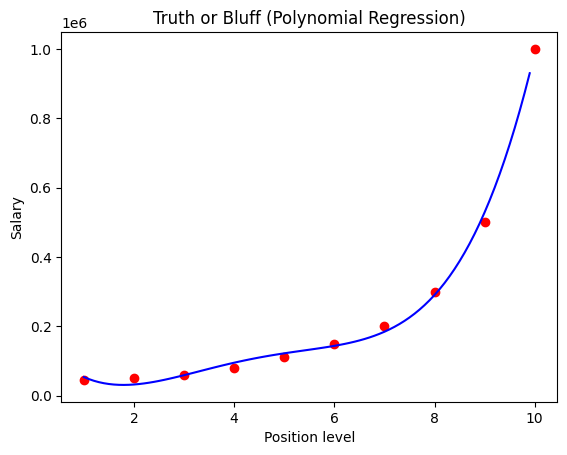

In [15]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

Here, we predict the salary at position level "6.5."

In [16]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

Similarly, we predict the same position level, but with the polynomial regression. This value is significantly more accurate.

In [17]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

## Finding the R-squared Value

Here, we find the R-squared value for the model on the test data, indicating how well the model fits the data.

An R-squared value ranges from 0-1, with a higher value indicating a stronger fit.

This will be completed with various regression models, to see which one works best for our dataset!

In [19]:
from sklearn.metrics import r2_score
Y_pred = lin_reg_2.predict(X_poly)
r_squared = r2_score(Y, Y_pred)
print(f"R-squared value: {r_squared}")

R-squared value: 0.9973922891706614
